In [9]:
print("Done")

Done


In [10]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [11]:
# set up file names and pathes
dataDir='.'
dataType='val2017'
algName = 'fakecap'
annFile='%s/annotations/captions_%s.json'%(dataDir,dataType)
print(annFile)
subtypes=['results', 'evalImgs', 'eval']
[resFile, evalImgsFile, evalFile]= \
['%s/results/captions_%s_%s_%s.json'%(dataDir,dataType,algName,subtype) for subtype in subtypes]
print(resFile, evalImgsFile, evalFile)
# download Stanford models
#./get_stanford_models.sh

./annotations/captions_val2017.json
./results/captions_val2017_fakecap_results.json ./results/captions_val2017_fakecap_evalImgs.json ./results/captions_val2017_fakecap_eval.json


In [12]:
# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
0:00:00.041300
creating index...
index created!
Loading and preparing results...     
DONE (t=0.01s)
creating index...
index created!


In [13]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
# SPICE will take a few minutes the first time, but speeds up due to caching
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 89175, 'reflen': 64675, 'guess': [89175, 84175, 79175, 74175], 'correct': [31008, 7289, 1678, 402]}
ratio: 1.3788171627367394
Bleu_1: 0.348
Bleu_2: 0.174
Bleu_3: 0.086
Bleu_4: 0.043
computing METEOR score...
METEOR: 0.145
computing Rouge score...
ROUGE_L: 0.286
computing CIDEr score...
CIDEr: 0.101
computing SPICE score...


CalledProcessError: Command '['java', '-jar', '-Xmx8G', 'spice-1.0.jar', '/home/shared/evaluate_writetokavitharepo/evaluate/pycocoevalcap/spice/tmp/tmpfs73boyr', '-cache', '/home/shared/evaluate_writetokavitharepo/evaluate/pycocoevalcap/spice/cache', '-out', '/home/shared/evaluate_writetokavitharepo/evaluate/pycocoevalcap/spice/tmp/tmpbvp9jjmu', '-subset', '-silent']' returned non-zero exit status 1.

In [14]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print(score)
    print('%s: %.3f'%(metric, score))

0.3477207737594578
Bleu_1: 0.348
0.17352327320312488
Bleu_2: 0.174
0.08609404553226031
Bleu_3: 0.086
0.04312429033457584
Bleu_4: 0.043
0.14457747079551644
METEOR: 0.145
0.28628745516217735
ROUGE_L: 0.286
0.10142917455230063
CIDEr: 0.101


Getting ground truth captions
A laptop computer sitting on a truck table.
A laptop on a table that looks like a tank 
a laptop computer sitting on top of a homemade machine with wheels
An all terrain robot with a laptop sitting on it in a lab.
A small tank like vehicle with wheels and a camera attached to the top, along with a laptop computer resting on top of it.

Getting generated caption
a bunch of photos and boxes of stacked breed <oov> out   the  also <oov> <oov>  
000000206218.jpg


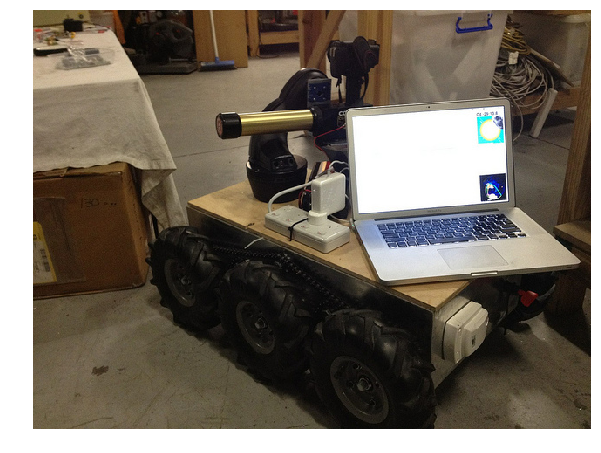

In [31]:
imgId = 206218
#Get ground truth captions
print('Getting ground truth captions')
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print('\r\nGetting generated caption')
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
print(img['file_name'])
dataDir = '/home/shared/cs231projrepo/cococapt/data'
#I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
plt.imshow(I)
plt.axis('off')
plt.show()



In [30]:
# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
print('Length of evals %d' %len(evals))
print('ground truth captions')
imgId = evals[0]['image_id']
print(imgId)
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print('\n')
print('generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr']))
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
plt.imshow(I)
plt.axis('off')
plt.show()

Length of evals 0
ground truth captions


IndexError: list index out of range

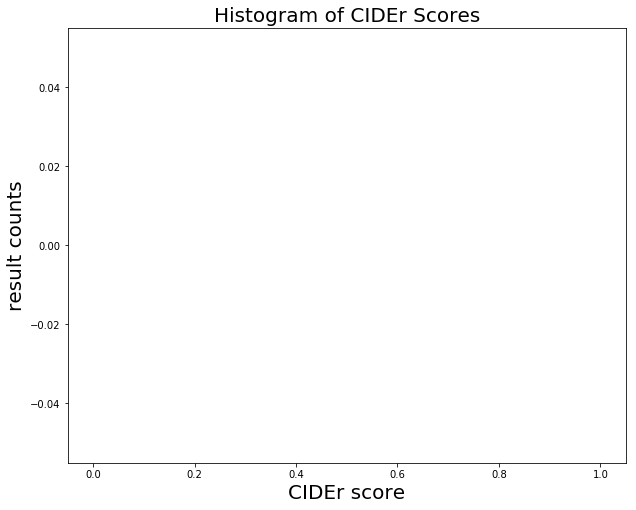

In [26]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [ ]:
# save evaluation results to ./results folder
json.dump(cocoEval.evalImgs, open(evalImgsFile, 'w'))
json.dump(cocoEval.eval,     open(evalFile, 'w'))